### Importar las librerias

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Importar el dataset de remuneraciones (formato XLSX), usando la primera fila útil como encabezado

In [5]:
archivos = r"D:\Stella\Documentos\POLITECNICO\2 año\Aprendizaje automático\Insumos Parcial\Insumos para el modelo\21_1_01_Remuneracion-promedio-de-los-trabajadores-registrados-del-sector-privado-segun-rama-de-actividad.xlsx"

df_remuneraciones = pd.read_excel(archivos, engine="openpyxl", header=2,)
print(df_remuneraciones.head())

  Rama de Actividad                                       Unnamed: 1  \
0                 A      AGRICULTURA, GANADERIA, CAZA Y SILVICULTURA   
1                 1                         Agricultura y ganadería    
2                 2              Silvicultura, extracción de madera    
3                 B                        PESCA Y SERVICIOS CONEXOS   
4                 5   Pesca y actividades relacionadas con la pesca    

  1995-01-01 00:00:00 1995-02-01 00:00:00 1995-03-01 00:00:00  \
0                 797                 738                 853   
1                 923                 821                 974   
2                 462                 517                 552   
3                1282                1229                1360   
4                1282                1229                1360   

  1995-04-01 00:00:00 1995-05-01 00:00:00 1995-06-01 00:00:00  \
0                 527                 469                1049   
1                 528                 461     

### Explorar columnas a utilizar, seleccionarlas y renombrarlas para una manipulación más efectiva

In [6]:
print(df_remuneraciones.columns.tolist())
print(type(df_remuneraciones.columns))

# Cambiar el nombre de las columnas para que sean más descriptivas o fáciles de usar
# Por ejemplo, renombrar las dos primeras columnas y dejar las fechas igual

df_remuneraciones = df_remuneraciones.rename(columns={
    df_remuneraciones.columns[0]: "Codigo",
    df_remuneraciones.columns[1]: "Rama_Actividad"
})

print(df_remuneraciones.columns[:10])  # Mostrar los primeros 10 nombres de columnas para verificar

# Renombrar las columnas desde "Rama_Actividad" en adelante para que tengan formato de fecha YYYY-MM
# Primero identificamos el índice de la columna "Rama_Actividad"
idx = df_remuneraciones.columns.get_loc("Rama_Actividad")

# Las columnas de fechas empiezan en el siguiente índice
fecha_cols = df_remuneraciones.columns[(idx+1):]

# Creamos nuevos nombres en formato YYYY-MM
nuevos_nombres = {}
for col in fecha_cols:
    try:
        # Intentar convertir el nombre de la columna a formato fecha
        fecha = pd.to_datetime(col, format='%Y-%m')
        nuevos_nombres[col] = fecha.strftime('%Y-%m')
    except Exception:
        # Si no se puede convertir, dejar el nombre original
        nuevos_nombres[col] = col

# Renombrar las columnas en el DataFrame
df_remuneraciones = df_remuneraciones.rename(columns=nuevos_nombres)

print(df_remuneraciones.columns[idx:idx+10])  # Mostrar los primeros 10 nombres después de "Rama_Actividad"
# Seleccionar las columnas "Codigo", "Rama_Actividad" y desde "2017-12" hasta el final
cols = df_remuneraciones.columns.tolist()
start_idx = cols.index("2017-12")
selected_cols = ["Codigo", "Rama_Actividad"] + cols[start_idx:]
df_remuneraciones_sel = df_remuneraciones[selected_cols]
print(df_remuneraciones_sel.head())

['Rama de Actividad', 'Unnamed: 1', datetime.datetime(1995, 1, 1, 0, 0), datetime.datetime(1995, 2, 1, 0, 0), datetime.datetime(1995, 3, 1, 0, 0), datetime.datetime(1995, 4, 1, 0, 0), datetime.datetime(1995, 5, 1, 0, 0), datetime.datetime(1995, 6, 1, 0, 0), datetime.datetime(1995, 7, 1, 0, 0), datetime.datetime(1995, 8, 1, 0, 0), datetime.datetime(1995, 9, 1, 0, 0), datetime.datetime(1995, 10, 1, 0, 0), datetime.datetime(1995, 11, 1, 0, 0), datetime.datetime(1995, 12, 1, 0, 0), datetime.datetime(1996, 1, 1, 0, 0), datetime.datetime(1996, 2, 1, 0, 0), datetime.datetime(1996, 3, 1, 0, 0), datetime.datetime(1996, 4, 1, 0, 0), datetime.datetime(1996, 5, 1, 0, 0), datetime.datetime(1996, 6, 1, 0, 0), datetime.datetime(1996, 7, 1, 0, 0), datetime.datetime(1996, 8, 1, 0, 0), datetime.datetime(1996, 9, 1, 0, 0), datetime.datetime(1996, 10, 1, 0, 0), datetime.datetime(1996, 11, 1, 0, 0), datetime.datetime(1996, 12, 1, 0, 0), datetime.datetime(1997, 1, 1, 0, 0), datetime.datetime(1997, 2, 1, 0, 

### Verificar nulos y duplicados

In [7]:
# Verificar registros nulos
print("Cantidad de valores nulos por columna:")
print(df_remuneraciones_sel.isnull().sum())

# Verificar registros duplicados
duplicados = df_remuneraciones_sel.duplicated()
print(f"\nCantidad de filas duplicadas: {duplicados.sum()}")

Cantidad de valores nulos por columna:
Codigo            0
Rama_Actividad    3
2017-12           1
2018-01           1
2018-02           1
                 ..
2024-08           1
2024-09           1
2024-10           1
2024-11           1
2024-12           1
Length: 87, dtype: int64

Cantidad de filas duplicadas: 0


### Se verifica en el dataset que los datos nulos corresponden a filas enteras vacías (usadas para como encabezados para separar categorías) se eliminan los registros ya que no inciden en el análisis

In [8]:
# Para corregir errores en el DataFrame, primero identificamos filas no válidas (como las de totales, fuentes o confidencialidad)
# Eliminamos filas donde 'Codigo' o 'Rama_Actividad' no sean válidas

# Filtrar filas donde 'Codigo' y 'Rama_Actividad' no sean nulos y 'Codigo' no sea 'Total' ni contenga 'Fuente' o 'Dato confidencial'
df_remuneraciones_sel_clean = df_remuneraciones_sel[
    df_remuneraciones_sel['Codigo'].notnull() &
    df_remuneraciones_sel['Rama_Actividad'].notnull() &
    (~df_remuneraciones_sel['Codigo'].astype(str).str.contains('Total|Fuente|Dato confidencial', case=False, na=False))
].copy()

# Resetear el índice
df_remuneraciones_sel_clean.reset_index(drop=True, inplace=True)

print(df_remuneraciones_sel_clean.head())

  Codigo                                   Rama_Actividad 2017-12 2018-01  \
0      A      AGRICULTURA, GANADERIA, CAZA Y SILVICULTURA   29477   20495   
1      1                         Agricultura y ganadería    30861   21524   
2      2              Silvicultura, extracción de madera    22224   14432   
3      B                        PESCA Y SERVICIOS CONEXOS   72125   56527   
4      5   Pesca y actividades relacionadas con la pesca    72125   56527   

  2018-02 2018-03 2018-04 2018-05 2018-06 2018-07  ...  2024-03  2024-04  \
0   20629   22372   22193   23158   33354   23985  ...   678022   794914   
1   22011   24093   24166   25689   36915   26425  ...   760692   905057   
2   13803   15061   13702   13125   20094   13129  ...   444725   454192   
3   53876   51386   56918   62512   99129   57314  ...  2503400  2329619   
4   53876   51386   56918   62512   99129   57314  ...  2503400  2329619   

   2024-05  2024-06  2024-07  2024-08  2024-09  2024-10  2024-11  2024-12  
0   

In [9]:
# Revisar el tipo de las columnas a partir de la columna "2017-12"
cols_fecha = df_remuneraciones_sel_clean.columns[2:]  # columnas desde la primera fecha en adelante

# Ver si los nombres de columnas son tipo datetime o string con formato YYYY-MM
print("Tipos de columnas de fecha:")
for col in cols_fecha[:5]:  # mostramos solo las primeras 5
    print(f"{col} → tipo: {type(col)}")

Tipos de columnas de fecha:
2017-12 → tipo: <class 'str'>
2018-01 → tipo: <class 'str'>
2018-02 → tipo: <class 'str'>
2018-03 → tipo: <class 'str'>
2018-04 → tipo: <class 'str'>


### Eliminar la columna "Codigo" y luego pivotear para dar formato optimizado para el análisis


In [10]:
df_rem_long = df_remuneraciones_sel_clean.drop(columns=["Codigo"]).melt(
    id_vars=["Rama_Actividad"],
    var_name="Fecha",
    value_name="Remuneracion"
)
df_rem_long["Fecha"] = pd.to_datetime(df_rem_long["Fecha"], format="%Y-%m")
df_rem_long = df_rem_long.dropna(subset=["Remuneracion"])
# Ver los valores únicos que hay en la columna Remuneracion
print(df_rem_long["Remuneracion"].unique())
df_rem_long.head(100)


[29477 30861 22224 ... 3178410 1928663 2446514]


,Rama_Actividad,Fecha,Remuneracion
0,"AGRICULTURA, GANADERIA, CAZA Y SILVICULTURA",2017-12-01,29477
1,Agricultura y ganadería,2017-12-01,30861
2,"Silvicultura, extracción de madera",2017-12-01,22224
3,PESCA Y SERVICIOS CONEXOS,2017-12-01,72125
4,Pesca y actividades relacionadas con la pesca,2017-12-01,72125
...,...,...,...
95,Maquinaria de oficina,2018-01-01,s
96,Aparatos eléctricos,2018-01-01,s
97,Radio y televisión,2018-01-01,42799
98,Instrumentos médicos,2018-01-01,s


### Verificar valores no reportados o nulos " s ", considerados nulos, eliminados

In [11]:
# Filtrar filas donde la remuneración es exactamente igual a "s"
filas_s = df_rem_long[df_rem_long["Remuneracion"] == " s "]

# Mostrar cuántas hay
print(f"Cantidad de registros con 's': {len(filas_s)}")

# Visualizar las primeras filas (si hay muchas)
display(filas_s.head(10))


Cantidad de registros con 's': 1141


,Rama_Actividad,Fecha,Remuneracion
7,Extracción de minerales metalíferos,2017-12-01,s
11,Tabaco,2017-12-01,s
13,Confecciones,2017-12-01,s
14,Cuero y calzado,2017-12-01,s
18,Productos de petróleo,2017-12-01,s
22,Metales comunes,2017-12-01,s
25,Maquinaria de oficina,2017-12-01,s
26,Aparatos eléctricos,2017-12-01,s
28,Instrumentos médicos,2017-12-01,s
30,Otros equipo de transporte,2017-12-01,s


In [12]:
# Lista de actividades a eliminar (con espacio final)
actividades_a_eliminar = [
    " Extracción de minerales metalíferos ",
    " Tabaco ",
    " Confecciones ",
    " Cuero y calzado ",
    " Productos de petróleo ",
    " Otros minerales no metálicos "
    " Metales comunes ",
    " Maquinaria de oficina ",
    " Aparatos eléctricos ",
    " Instrumentos médicos ",
    " Otros equipo de transporte "
]

# Filtrar el DataFrame eliminando las actividades
df_rem_long = df_rem_long[~df_rem_long["Rama_Actividad"].isin(actividades_a_eliminar)].copy()

# Reiniciar índice
df_rem_long.reset_index(drop=True, inplace=True)
df_rem_long.head(100)


,Rama_Actividad,Fecha,Remuneracion
0,"AGRICULTURA, GANADERIA, CAZA Y SILVICULTURA",2017-12-01,29477
1,Agricultura y ganadería,2017-12-01,30861
2,"Silvicultura, extracción de madera",2017-12-01,22224
3,PESCA Y SERVICIOS CONEXOS,2017-12-01,72125
4,Pesca y actividades relacionadas con la pesca,2017-12-01,72125
...,...,...,...
95,Servicios de hotelería y restaurantes,2018-01-01,28910
96,"SERVICIOS DE TRANSPORTE, DE ALMACENAMIENTO Y D...",2018-01-01,40908
97,Transporte ferroviario y automotor y por tube...,2018-01-01,33501
98,Transporte marítimo y fluvial,2018-01-01,40790


### Veamos si podemos avanzar con el EDA

In [13]:
# Ver dimensiones del dataframe
print("Dimensiones del DataFrame:", df_rem_long.shape)

# Ver tipos de datos
print("\nTipos de datos:")
print(df_rem_long.dtypes)

# Ver rango temporal de las fechas
print("\nRango de fechas:")
print("Desde:", df_rem_long["Fecha"].min())
print("Hasta:", df_rem_long["Fecha"].max())

# Ver cuántas ramas únicas hay
print("\nCantidad de ramas de actividad:", df_rem_long["Rama_Actividad"].nunique())


Dimensiones del DataFrame: (5185, 3)

Tipos de datos:
Rama_Actividad            object
Fecha             datetime64[ns]
Remuneracion              object
dtype: object

Rango de fechas:
Desde: 2017-12-01 00:00:00
Hasta: 2024-12-01 00:00:00

Cantidad de ramas de actividad: 61


In [14]:
# Verificar nulos
print("\nValores nulos por columna:")
print(df_rem_long.isnull().sum())

# Ver estadísticos básicos (solo para Remuneración si es numérica)
print("\nResumen estadístico:")
print(df_rem_long.describe())



Valores nulos por columna:
Rama_Actividad    0
Fecha             0
Remuneracion      0
dtype: int64

Resumen estadístico:
                               Fecha
count                           5185
mean   2021-06-01 02:15:31.764705792
min              2017-12-01 00:00:00
25%              2019-09-01 00:00:00
50%              2021-06-01 00:00:00
75%              2023-03-01 00:00:00
max              2024-12-01 00:00:00


In [15]:
# Filtrar filas donde la remuneración es exactamente igual a "s"
filas_s = df_rem_long[df_rem_long["Remuneracion"] == " s "]

# Mostrar cuántas hay
print(f"Cantidad de registros con 's': {len(filas_s)}")

# Visualizar las primeras filas (si hay muchas)
display(filas_s.head(10))


Cantidad de registros con 's': 376


,Rama_Actividad,Fecha,Remuneracion
17,Metales comunes,2017-12-01,s
23,Reciclamiento de desperdicios y desechos,2017-12-01,s
26,"Captación, depuración y distribución de agua",2017-12-01,s
49,Investigación y desarrollo,2017-12-01,s
77,Otros minerales no metálicos,2018-01-01,s
78,Metales comunes,2018-01-01,s
87,"Captación, depuración y distribución de agua",2018-01-01,s
110,Investigación y desarrollo,2018-01-01,s
138,Otros minerales no metálicos,2018-02-01,s
139,Metales comunes,2018-02-01,s


In [16]:
# Lista de actividades a eliminar (con espacio final)
actividades_a_eliminar = [
    " Extracción de minerales metalíferos ",
    " Tabaco ",
    " Confecciones ",
    " Cuero y calzado ",
    " Productos de petróleo ",
    " Otros minerales no metálicos "
    " Metales comunes ",
    " Maquinaria de oficina ",
    " Aparatos eléctricos ",
    " Instrumentos médicos ",
    " Papel ",
    " Captación, depuración y distribución de agua ",
     "Investigación y desarrollo ",
    " Otros equipo de transporte "
]

# Filtrar el DataFrame eliminando las actividades
df_rem_long = df_rem_long[~df_rem_long["Rama_Actividad"].isin(actividades_a_eliminar)].copy()

# Reiniciar índice
df_rem_long.reset_index(drop=True, inplace=True)
df_rem_long.head(100)


,Rama_Actividad,Fecha,Remuneracion
0,"AGRICULTURA, GANADERIA, CAZA Y SILVICULTURA",2017-12-01,29477
1,Agricultura y ganadería,2017-12-01,30861
2,"Silvicultura, extracción de madera",2017-12-01,22224
3,PESCA Y SERVICIOS CONEXOS,2017-12-01,72125
4,Pesca y actividades relacionadas con la pesca,2017-12-01,72125
...,...,...,...
95,Transporte aéreo de cargas y de pasajeros,2018-01-01,100470
96,"Manipulación de carga, almacenamiento y depós...",2018-01-01,33749
97,Telecomunicaciones y correos,2018-01-01,70106
98,INTERMEDIACION FINANCIERA Y OTROS SERVICIOS FI...,2018-01-01,50423


In [17]:
# Filtrar filas donde la remuneración es exactamente igual a "s"
filas_s = df_rem_long[df_rem_long["Remuneracion"] == " s "]

# Mostrar cuántas hay
print(f"Cantidad de registros con 's': {len(filas_s)}")

# Visualizar las primeras filas (si hay muchas)
display(filas_s.head(10))

Cantidad de registros con 's': 219


,Rama_Actividad,Fecha,Remuneracion
16,Metales comunes,2017-12-01,s
22,Reciclamiento de desperdicios y desechos,2017-12-01,s
47,Investigación y desarrollo,2017-12-01,s
74,Otros minerales no metálicos,2018-01-01,s
75,Metales comunes,2018-01-01,s
106,Investigación y desarrollo,2018-01-01,s
133,Otros minerales no metálicos,2018-02-01,s
134,Metales comunes,2018-02-01,s
165,Investigación y desarrollo,2018-02-01,s
192,Otros minerales no metálicos,2018-03-01,s


In [18]:
# Paso 1: Convertir a string y quitar espacios
df_rem_long["Remuneracion"] = df_rem_long["Remuneracion"].astype(str).str.strip()

# Paso 2: Reemplazar todos los valores 's' (sin importar mayúscula/minúscula)
df_rem_long["Remuneracion"] = df_rem_long["Remuneracion"].replace(
    to_replace=r'(?i)^s$', value=np.nan, regex=True
)

# Paso 3: Verificar cuántos 's' quedan (debería dar 0)
print("Valores 's' restantes:", df_rem_long["Remuneracion"].str.fullmatch(r's', case=False).sum())

# Paso 4: Convertir a float
df_rem_long["Remuneracion"] = df_rem_long["Remuneracion"].astype(float)


Valores 's' restantes: 0


In [19]:
# Reemplazar 's' (con posibles espacios) por NaN y eliminar esas filas
df_rem_long["Remuneracion"] = df_rem_long["Remuneracion"].astype(str).str.strip()
df_rem_long["Remuneracion"] = df_rem_long["Remuneracion"].replace("s", np.nan)

# Eliminar las filas con valores nulos
df_rem_long = df_rem_long.dropna(subset=["Remuneracion"])

# Convertir a float
df_rem_long["Remuneracion"] = df_rem_long["Remuneracion"].astype(float)


In [20]:
# Filtrar filas donde 'Remuneracion' no puede convertirse a número
no_numericas = df_rem_long[pd.to_numeric(df_rem_long["Remuneracion"], errors="coerce").isna()]

# Mostrar la cantidad
print(f"Cantidad de valores no numéricos en 'Remuneracion': {len(no_numericas)}")

# Mostrar las filas
display(no_numericas)
# Eliminar filas donde Remuneracion es NaN
df_rem_long = df_rem_long.dropna(subset=["Remuneracion"]).copy()

# Verificar que se eliminaron correctamente
print(f"Dimensiones finales del DataFrame: {df_rem_long.shape}")
print(f"¿Aún quedan NaNs en Remuneracion?: {df_rem_long['Remuneracion'].isna().sum()}")




Cantidad de valores no numéricos en 'Remuneracion': 219


,Rama_Actividad,Fecha,Remuneracion
16,Metales comunes,2017-12-01,NaN
22,Reciclamiento de desperdicios y desechos,2017-12-01,NaN
47,Investigación y desarrollo,2017-12-01,NaN
74,Otros minerales no metálicos,2018-01-01,NaN
75,Metales comunes,2018-01-01,NaN
...,...,...,...
4885,Investigación y desarrollo,2024-10-01,NaN
4913,Metales comunes,2024-11-01,NaN
4944,Investigación y desarrollo,2024-11-01,NaN
4972,Metales comunes,2024-12-01,NaN


Dimensiones finales del DataFrame: (4796, 3)
¿Aún quedan NaNs en Remuneracion?: 0


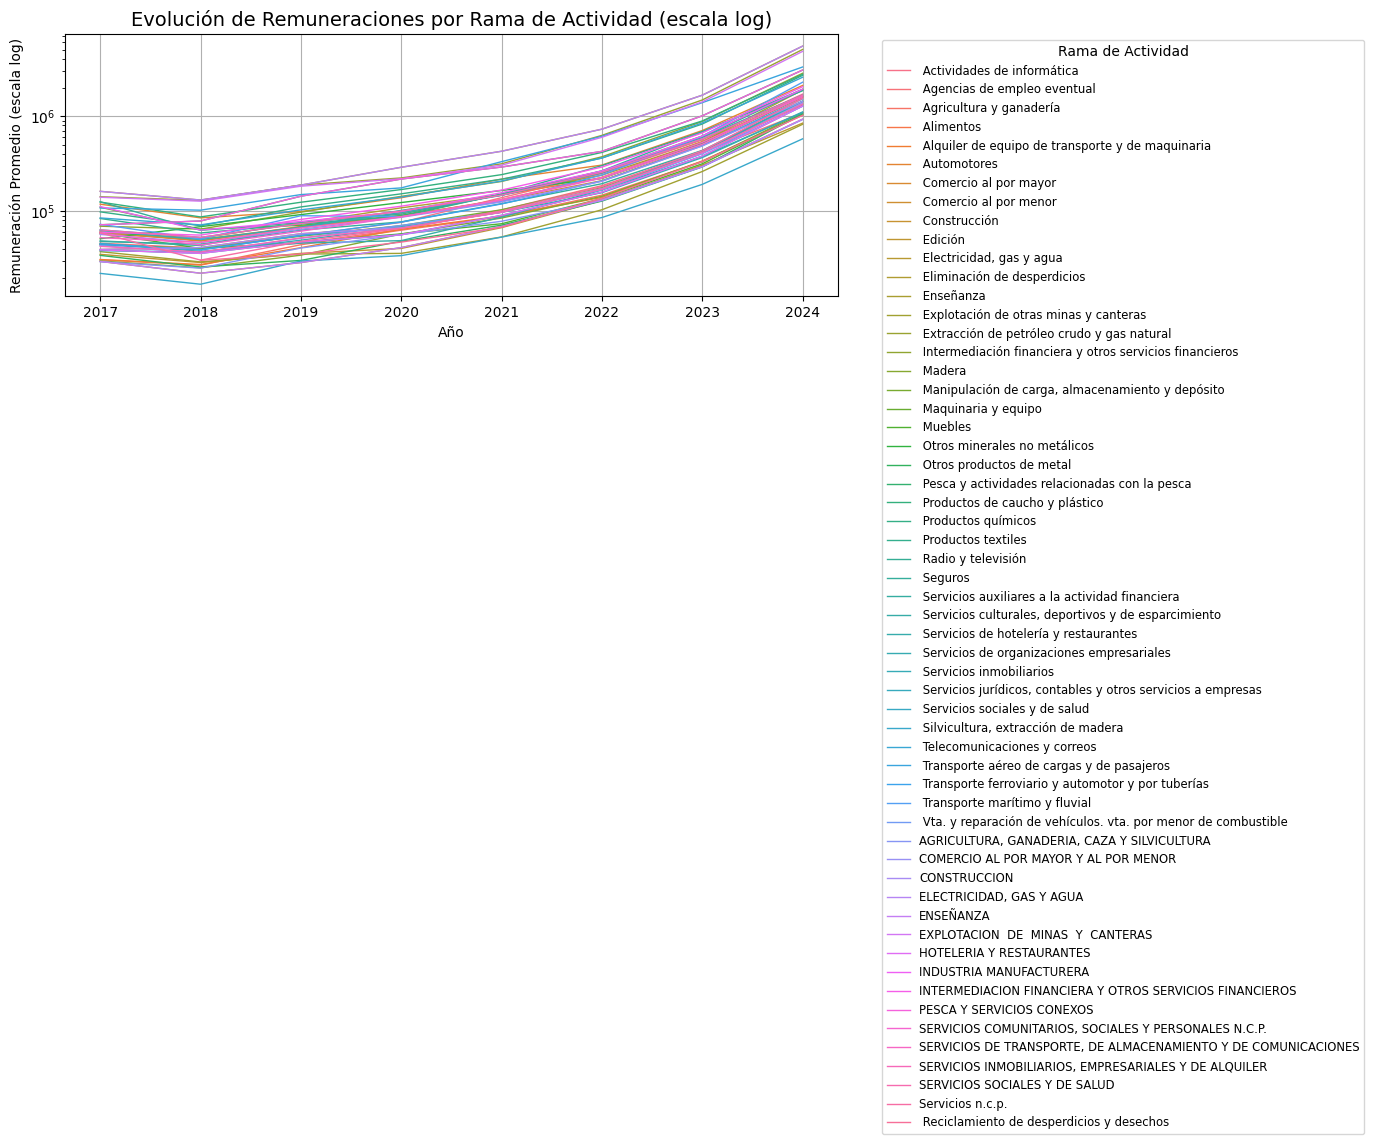

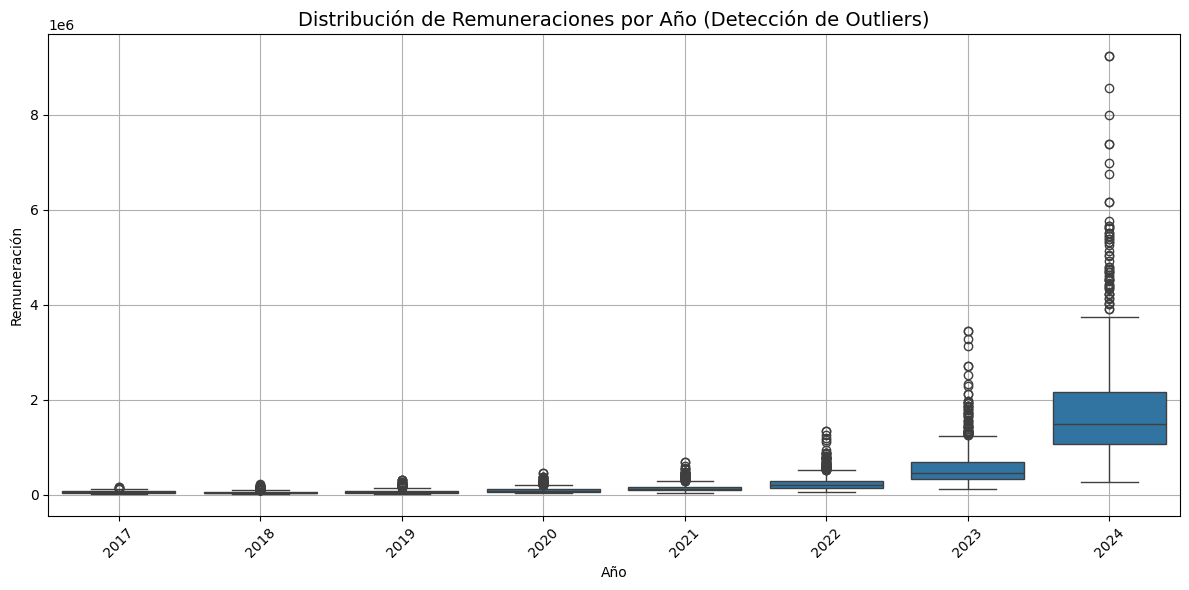

In [21]:
# Asegurarse de que Remuneracion sea tipo float
df_rem_long["Remuneracion"] = pd.to_numeric(df_rem_long["Remuneracion"], errors='coerce')

# Agregar columna 'Año'
df_rem_long["Año"] = df_rem_long["Fecha"].dt.year

# === 1. Gráfico de evolución promedio por actividad y año (escala log) ===
plt.figure(figsize=(14, 8))
df_grouped = df_rem_long.groupby(["Año", "Rama_Actividad"])["Remuneracion"].mean().reset_index()
sns.lineplot(data=df_grouped, x="Año", y="Remuneracion", hue="Rama_Actividad", linewidth=1)

plt.yscale("log")
plt.title("Evolución de Remuneraciones por Rama de Actividad (escala log)", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Remuneración Promedio (escala log)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize="small", title="Rama de Actividad")
plt.tight_layout()
plt.grid(True)
plt.show()

# === 2. Boxplot por año para detectar outliers ===
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_rem_long, x="Año", y="Remuneracion")
plt.title("Distribución de Remuneraciones por Año (Detección de Outliers)", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Remuneración")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


In [22]:
# Calcular el umbral de outliers (percentil 99)
umbral = df_rem_long["Remuneracion"].quantile(0.99)

# Filtrar las filas que superan ese umbral
outliers = df_rem_long[df_rem_long["Remuneracion"] > umbral]

# Contar cuántos hay por rama
outliers_por_rama = outliers["Rama_Actividad"].value_counts().reset_index()
outliers_por_rama.columns = ["Rama_Actividad", "Cantidad de Outliers"]

# Mostrar
print(f"Umbral de outliers (percentil 99): {umbral:,.0f}")
display(outliers_por_rama)


Umbral de outliers (percentil 99): 4,227,194


,Rama_Actividad,Cantidad de Outliers
0,EXPLOTACION DE MINAS Y CANTERAS,9
1,Extracción de petróleo crudo y gas natural,9
2,"ELECTRICIDAD, GAS Y AGUA",9
3,"Electricidad, gas y agua",9
4,Transporte aéreo de cargas y de pasajeros,2
5,PESCA Y SERVICIOS CONEXOS,1
6,Pesca y actividades relacionadas con la pesca,1
7,Productos químicos,1
8,Productos de caucho y plástico,1
9,Radio y televisión,1


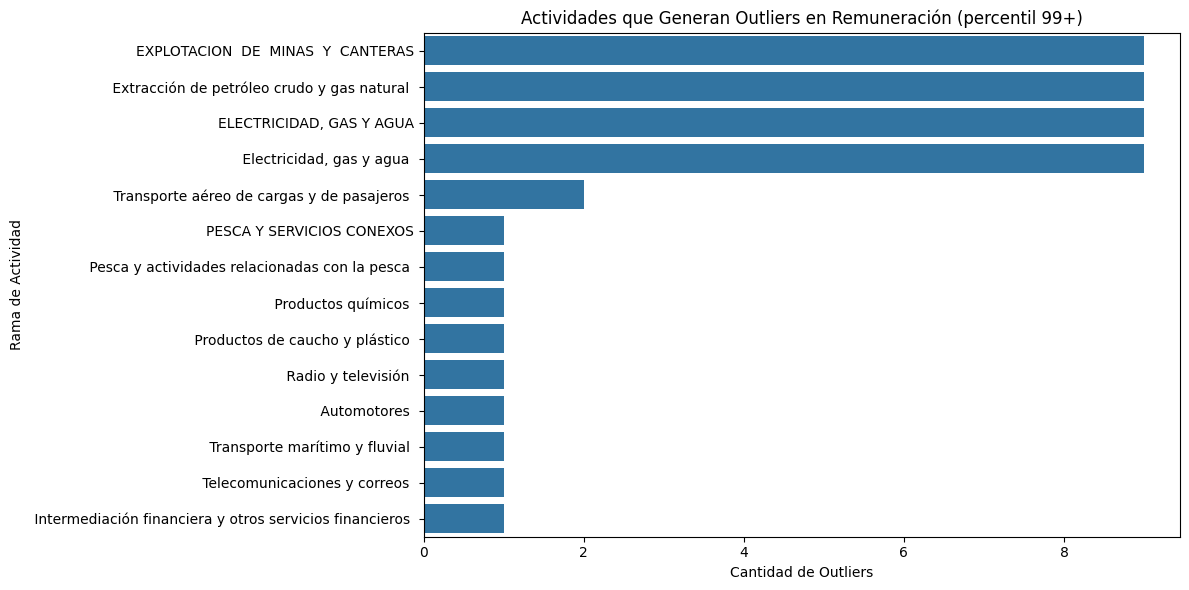

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=outliers, y="Rama_Actividad", order=outliers["Rama_Actividad"].value_counts().index)
plt.title("Actividades que Generan Outliers en Remuneración (percentil 99+)")
plt.xlabel("Cantidad de Outliers")
plt.ylabel("Rama de Actividad")
plt.tight_layout()
plt.show()


C:\Users\usuario\AppData\Local\Temp\ipykernel_4844\2250757408.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promedio_por_rama.values, y=promedio_por_rama.index, palette="viridis")


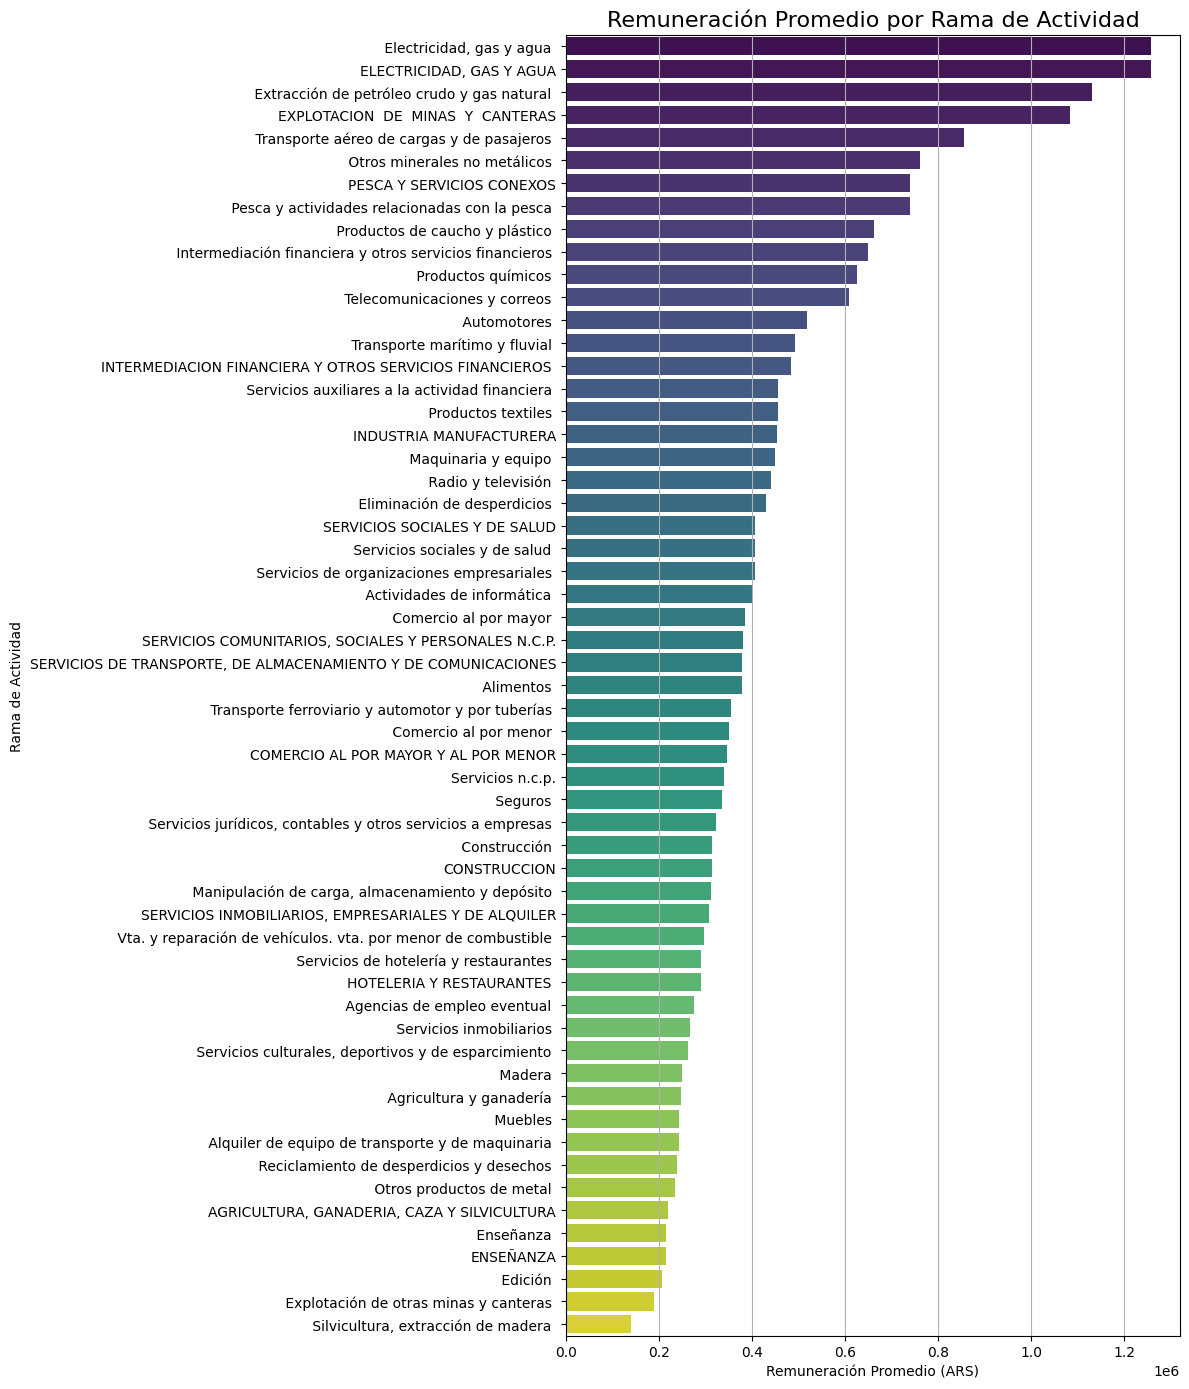

In [24]:
# Calcular el promedio por actividad
promedio_por_rama = (
    df_rem_long.groupby("Rama_Actividad")["Remuneracion"]
    .mean()
    .sort_values(ascending=False)
)

# Crear gráfico de barras horizontales
plt.figure(figsize=(12, 14))
sns.barplot(x=promedio_por_rama.values, y=promedio_por_rama.index, palette="viridis")

plt.title("Remuneración Promedio por Rama de Actividad", fontsize=16)
plt.xlabel("Remuneración Promedio (ARS)")
plt.ylabel("Rama de Actividad")
plt.tight_layout()
plt.grid(axis="x")
plt.show()


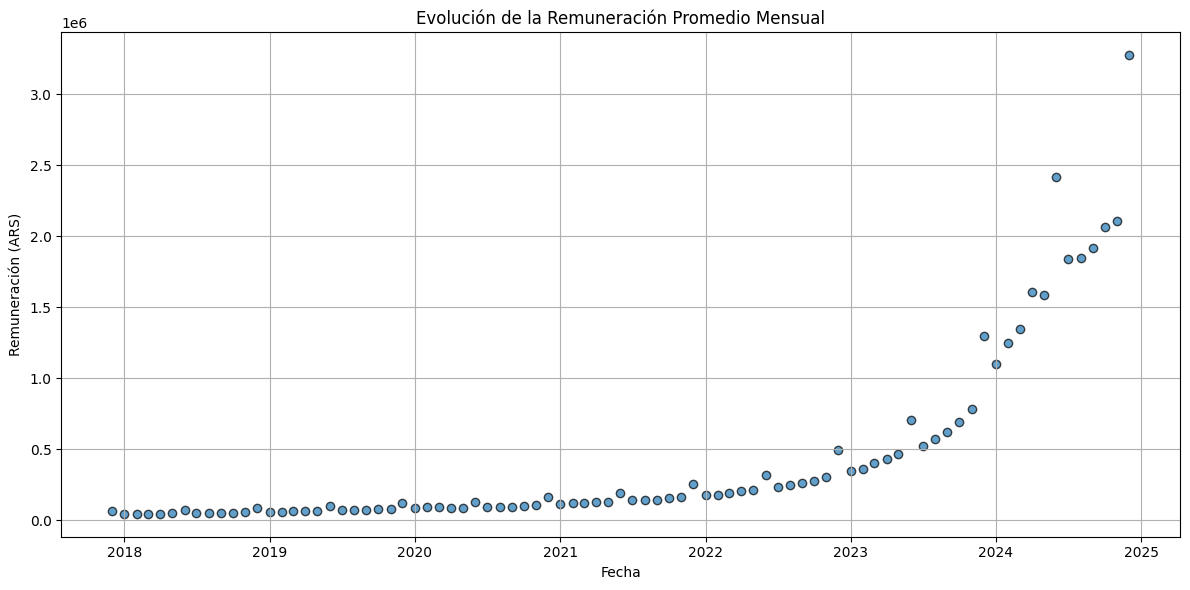

In [25]:
# Calcular la remuneración promedio mensual para todas las ramas
df_prom_mensual = df_rem_long.groupby("Fecha")["Remuneracion"].mean().reset_index()

# Crear gráfico de dispersión
plt.figure(figsize=(12, 6))
plt.scatter(df_prom_mensual["Fecha"], df_prom_mensual["Remuneracion"], alpha=0.7, edgecolor='k')
plt.title("Evolución de la Remuneración Promedio Mensual")
plt.xlabel("Fecha")
plt.ylabel("Remuneración (ARS)")
plt.grid(True)
plt.tight_layout()
plt.show()


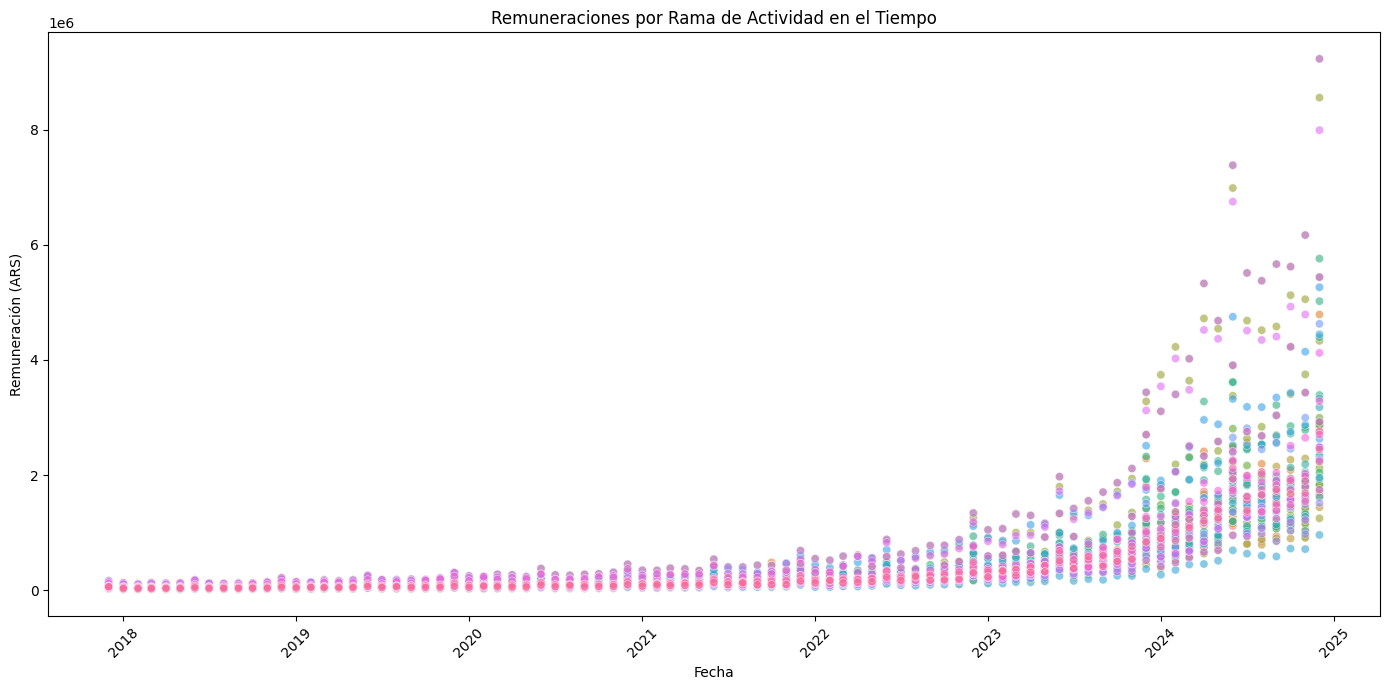

In [26]:

# Promedio por rama (eje X) y fecha (eje Y), para reducir cantidad de puntos
df_avg_rama_fecha = df_rem_long.groupby(["Rama_Actividad", "Fecha"])["Remuneracion"].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.scatterplot(
    data=df_avg_rama_fecha,
    x="Fecha",
    y="Remuneracion",
    hue="Rama_Actividad",
    legend=False,
    alpha=0.6
)
plt.title("Remuneraciones por Rama de Actividad en el Tiempo")
plt.xlabel("Fecha")
plt.ylabel("Remuneración (ARS)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


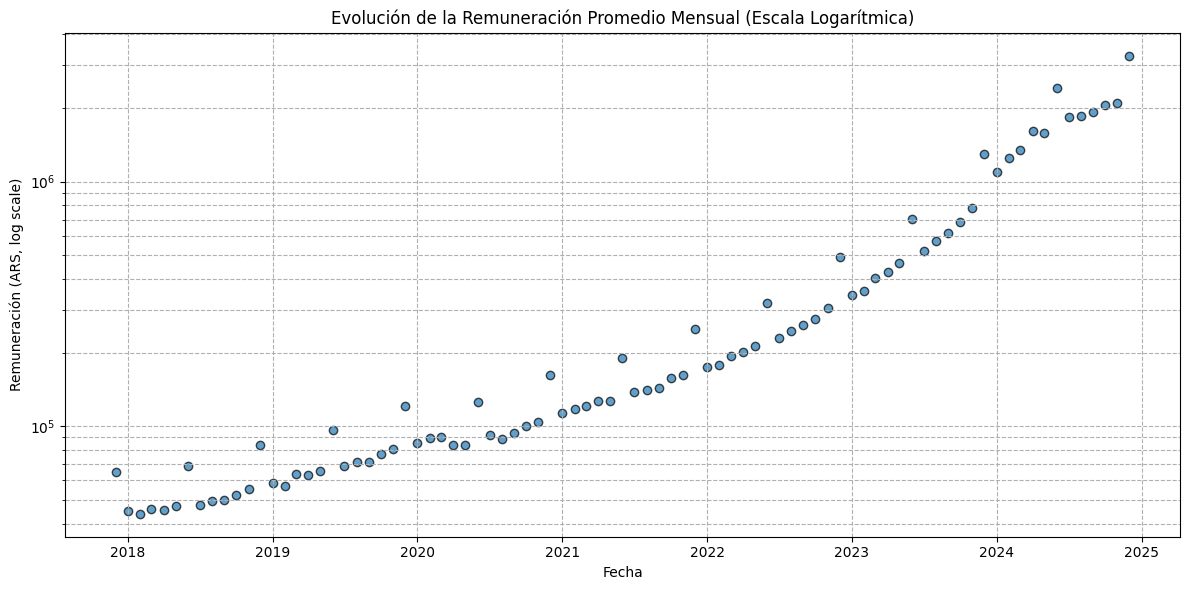

In [27]:
# Promedio mensual para todas las ramas
df_prom_mensual = df_rem_long.groupby("Fecha")["Remuneracion"].mean().reset_index()

# Gráfico de dispersión con escala logarítmica
plt.figure(figsize=(12, 6))
plt.scatter(df_prom_mensual["Fecha"], df_prom_mensual["Remuneracion"], alpha=0.7, edgecolor='k')
plt.yscale('log')  # Escala logarítmica
plt.title("Evolución de la Remuneración Promedio Mensual (Escala Logarítmica)")
plt.xlabel("Fecha")
plt.ylabel("Remuneración (ARS, log scale)")
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()


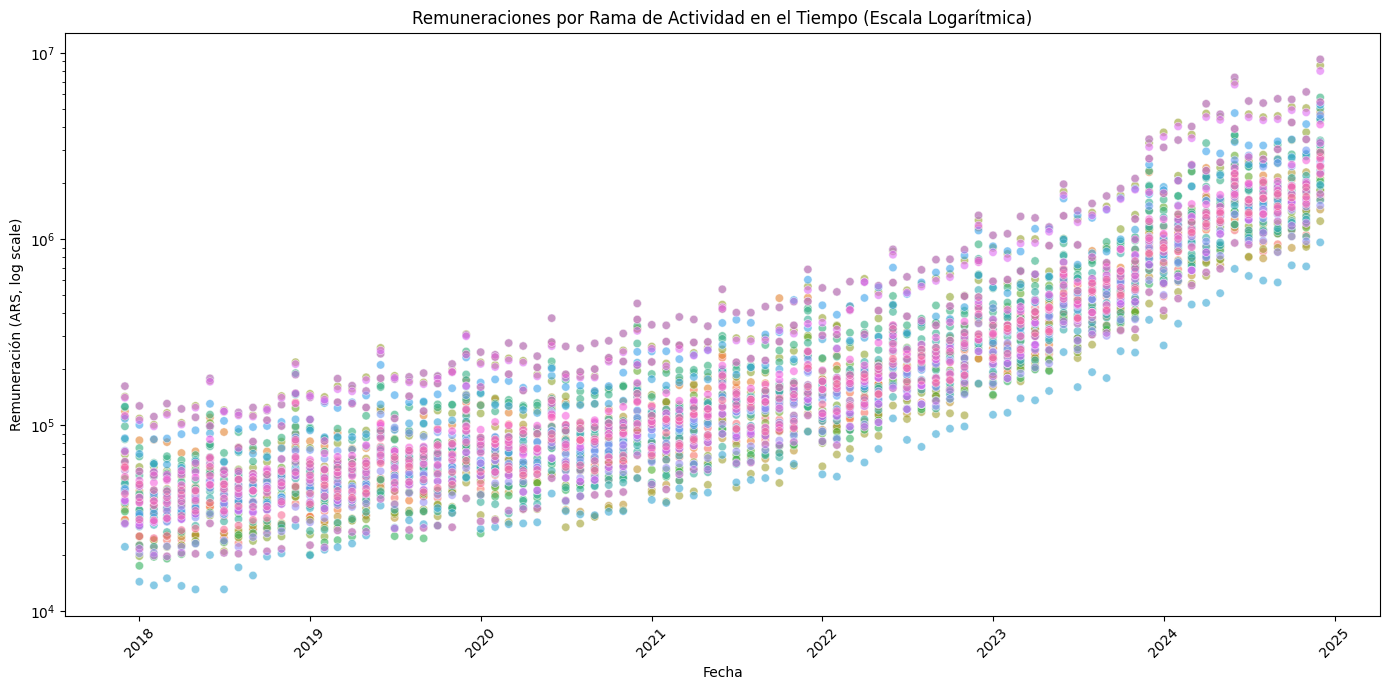

In [28]:
# Promedio por rama y fecha
df_avg_rama_fecha = df_rem_long.groupby(["Rama_Actividad", "Fecha"])["Remuneracion"].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.scatterplot(
    data=df_avg_rama_fecha,
    x="Fecha",
    y="Remuneracion",
    hue="Rama_Actividad",
    legend=False,
    alpha=0.6
)
plt.yscale('log')  # Escala logarítmica
plt.title("Remuneraciones por Rama de Actividad en el Tiempo (Escala Logarítmica)")
plt.xlabel("Fecha")
plt.ylabel("Remuneración (ARS, log scale)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Implementación del escalado para atenuar efecto de outliers

       Remuneracion  Remuneracion_Escalada
count  4.796000e+03            4796.000000
mean   4.410213e+05               0.889872
std    7.981920e+05               2.321036
min    1.312500e+04              -0.354393
25%    6.303950e+04              -0.209249
50%    1.349990e+05               0.000000
75%    4.069342e+05               0.790751
max    9.229930e+06              26.446845


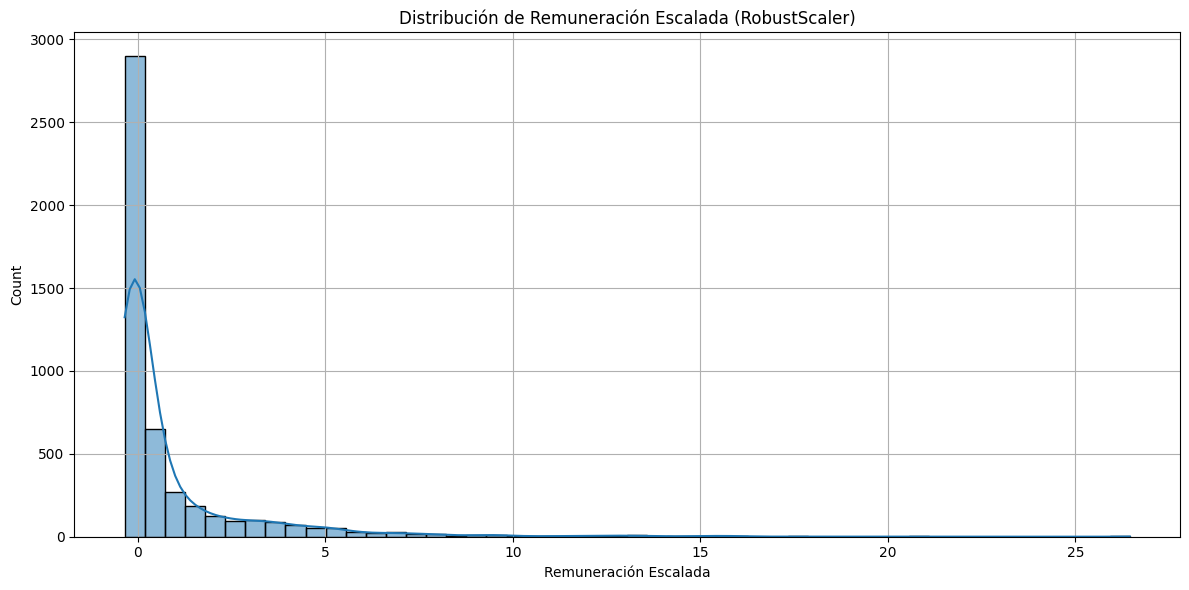

In [29]:
from sklearn.preprocessing import RobustScaler

# Crear una copia del dataframe original limpio
df_scaled = df_rem_long.copy()

# Inicializar el escalador robusto
scaler = RobustScaler()

# Aplicar el escalador sobre la columna 'Remuneracion' y crear una nueva columna
df_scaled["Remuneracion_Escalada"] = scaler.fit_transform(df_scaled[["Remuneracion"]])

# Ver un resumen para asegurarte que funcionó
print(df_scaled[["Remuneracion", "Remuneracion_Escalada"]].describe())

# Visualizar cómo se comporta después del escalado
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df_scaled["Remuneracion_Escalada"], bins=50, kde=True)
plt.title("Distribución de Remuneración Escalada (RobustScaler)")
plt.xlabel("Remuneración Escalada")
plt.grid(True)
plt.tight_layout()
plt.show()


### Incorporar Dataset de IPC Patagonia

In [37]:
# Crear el Dataframe para la base de datos de la variacion de precios

df_precios = pd.read_excel("17_1_04_IPC_variaciones_interanuales_segun_divisiones_de_la_canasta_categorias_bienes_y_servicios._Patagonia.xlsx", engine="openpyxl", header=3,skiprows=2)
df_precios.head()

##ver nombre de las columnas
print(df_precios.columns.tolist())

# Renombrar la primera columna
df_precios = df_precios.rename(columns={'Unnamed: 0': 'Categoria'})

# Obtener los nombres de columnas actuales
cols = df_precios.columns.tolist()

# Encontrar el índice de 'Unnamed: 1'
idx_fecha = cols.index('Unnamed: 1')

# Generar nuevos nombres para las columnas de fechas
nuevos_nombres = {}
for i, col in enumerate(cols[idx_fecha:], start=0):
    # Asignar nombres de fecha a partir de '2017-12'
    fecha = pd.to_datetime('2017-12') + pd.DateOffset(months=i)
    nuevos_nombres[col] = fecha.strftime('%Y-%m')

# Renombrar las columnas en el DataFrame
df_precios = df_precios.rename(columns=nuevos_nombres)

print(df_precios.columns.tolist())

# Detectar valores nulos en df_precios
print("Cantidad de valores nulos por columna en df_precios:")
print(df_precios.isnull().sum())

# Detectar filas duplicadas en df_precios
duplicados_precios = df_precios.duplicated()
print(f"\nCantidad de filas duplicadas en df_precios: {duplicados_precios.sum()}")

print("Cantidad de filas en df_precios:", len(df_precios))

print(df_precios['Categoria'].unique())

# Filtrar las filas útiles: desde 'Nivel general' hasta 'Servicios'
start_idx = df_precios[df_precios['Categoria'] == 'Nivel general'].index[0]
end_idx = df_precios[df_precios['Categoria'] == 'Servicios'].index[0]
df_precios_limpio = df_precios.loc[start_idx:end_idx].reset_index(drop=True)

# Ver los primeros datos para asegurarte
print(df_precios_limpio.head())

# Contar los nulos por columna
nulos_por_columna = df_precios_limpio.isna().sum()

# Contar nulos totales
total_nulos = df_precios_limpio.isna().sum().sum()

print("Nulos por columna:\n", nulos_por_columna)
print("\nTotal de nulos:", total_nulos)

df_precios_limpio = df_precios_limpio.dropna(axis=1, how='all')
df_precios_limpio.head(22)

df_precios_limpio = df_precios_limpio.dropna(axis=0, how='any').reset_index(drop=True)
print(df_precios_limpio)



['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 'Unn

In [38]:
df_precios_limpio.head(22)

,Categoria,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,...,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,2025-01,2025-02,2025-03,2025-04
0,Nivel general,23.5,23.5,23.9,25.1,26.0,26.3,29.1,31.2,33.7,...,264.2,239.7,209.1,195.0,172.2,124.7,85.5,72.0,60.9,52.3
1,Alimentos y bebidas no alcohólicas,16.9,17.4,18.2,18.7,19.8,20.5,25.5,29.6,33.1,...,283.0,252.9,209.6,193.1,165.0,111.0,69.1,61.0,50.4,46.9
2,Bebidas alcohólicas y tabaco,22.5,23.7,20.7,20.3,18.8,19.0,18.5,18.8,19.2,...,255.9,239.6,208.9,189.4,173.0,133.0,93.8,65.0,49.4,44.8
3,Prendas de vestir y calzado,14.6,13.2,12.6,13.9,17.6,17.3,17.5,17.2,17.1,...,193.9,176.0,151.3,139.8,122.1,95.4,76.4,61.8,48.8,43.7
4,"Vivienda, agua, electricidad y otros combustibles",48.8,48.0,46.7,49.3,52.2,47.4,46.3,45.7,45.5,...,306.8,309.3,286.4,290.1,290.4,268.1,223.7,202.5,187.0,112.0
5,Equipamiento y mantenimiento del hogar,15.9,16.1,17.7,21.7,23.2,23.4,26.6,30.1,34.8,...,257.7,226.3,193.4,173.6,141.9,92.0,54.9,42.4,40.5,31.7
6,Salud,28.1,24.3,23.8,24.6,25.2,26.9,29.7,29.4,30.9,...,278.9,241.3,220.9,221.4,190.2,122.8,88.3,71.2,58.7,49.8
7,Transporte,27.1,26.8,29.0,28.5,30.3,33.4,39.9,44.4,49.5,...,261.7,233.4,216.9,194.4,173.0,113.7,67.5,52.3,38.6,35.9
8,Comunicación,28.7,27.2,32.3,33.1,24.6,28.0,28.3,28.6,38.1,...,297.0,299.6,283.9,254.4,220.2,193.4,142.2,100.8,82.9,65.9
9,Recreación y cultura,24.5,27.9,27.9,27.5,24.3,23.8,26.1,29.0,29.5,...,240.7,201.9,168.7,156.1,135.8,96.5,69.9,59.4,52.8,43.6


### Convertir Df IPC a formato largo para poder integrarlo con el resto de los datos

In [39]:
# Convertir columnas de fecha a formato largo
df_precios_long = df_precios_limpio.melt(
    id_vars="Categoria",
    var_name="Fecha",
    value_name="IPC_Variacion"
)

# Convertir las fechas a datetime (formato año-mes)
df_precios_long["Fecha"] = pd.to_datetime(df_precios_long["Fecha"], format="%Y-%m", errors="coerce")

# Filtrar solo desde dic-2017 hasta dic-2023 (como el de remuneraciones)
df_precios_long = df_precios_long[
    (df_precios_long["Fecha"] >= "2017-12-01") & (df_precios_long["Fecha"] <= "2023-12-01")
].reset_index(drop=True)

# Verificar el resultado
print(df_precios_long.head())
print(df_precios_long["Fecha"].min(), "→", df_precios_long["Fecha"].max())


                                           Categoria      Fecha IPC_Variacion
0                                      Nivel general 2017-12-01          23.5
1                 Alimentos y bebidas no alcohólicas 2017-12-01          16.9
2                       Bebidas alcohólicas y tabaco 2017-12-01          22.5
3                        Prendas de vestir y calzado 2017-12-01          14.6
4  Vivienda, agua, electricidad y otros combustibles 2017-12-01          48.8
2017-12-01 00:00:00 → 2023-12-01 00:00:00
